# Artificial Neural Networks and Deep Learning

---

## Homework 1: Minimal Working Example

To make your first submission, follow these steps:
1. Create a folder named `[2024-2025] AN2DL/Homework 1` in your Google Drive.
2. Upload the `training_set.npz` file to this folder.
3. Upload the Jupyter notebook `Homework 1 - Minimal Working Example.ipynb`.
4. Load and process the data.
5. Implement and train your model.
6. Submit the generated `.zip` file to Codabench.


## 🌐 Connect Colab to Google Drive

In [ ]:
from google.colab import drive

drive.mount('/gdrive')
%cd /gdrive/My Drive/[2024-2025] AN2DL/Homework 1

Mounted at /gdrive
[Errno 2] No such file or directory: '/gdrive/My Drive/[2024-2025] AN2DL/Homework 1'
/content


## ⚙️ Import Libraries

In [ ]:
# Set seed for reproducibility
seed = 42

# Import necessary libraries
import os

# Set environment variables before importing modules
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import logging
import random
import numpy as np

# Set seeds for random number generators in NumPy and Python
np.random.seed(seed)
random.seed(seed)

# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl

# Set seed for TensorFlow
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

# Reduce TensorFlow verbosity
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Print TensorFlow version
print(tf.__version__)

# Import other libraries
import requests
from io import BytesIO
import cv2
from PIL import Image
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report


# Configure plot display settings
sns.set(font_scale=1.4)
sns.set_style('white')
plt.rc('font', size=14)
%matplotlib inline

2.17.0


## ⏳ Load the Data

In [ ]:
def load_data():
    # Load dataset with TensorFlow Datasets, obtaining dataset info

    data = np.load('/gdrive/.shortcut-targets-by-id/1JMiRhyfP5Aqdr8qBtb9CMaIkuwWd62CR/[2024-2025] AN2DL/Homework 1/training_set.npz')
    train_dataset = data['images']
    test_dataset= data['labels']

    X_test_RickRoll = train_dataset[11959:]  # Adjust if needed
    y_test_RickRoll = test_dataset[11959:]    # Adjust if needed

    train_dataset = train_dataset[:11959]
    test_dataset = test_dataset[:11959]


    return (train_dataset,test_dataset, X_test_RickRoll, y_test_RickRoll)



# Execute function and load data
(X_test, y_test, X_test_RickRoll, y_test_RickRoll) = load_data()

print("Test set shape (images):", X_test.shape)
print("Test set shape (labels):", y_test.shape)

print("Test set shape (images):", X_test_RickRoll.shape)
print("Test set shape (labels):", y_test_RickRoll.shape)

Test set shape (images): (11959, 96, 96, 3)
Test set shape (labels): (11959, 1)
Test set shape (images): (1800, 96, 96, 3)
Test set shape (labels): (1800, 1)


## 🛠️ Train and Save the Model

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X_test, y_test, random_state=seed, test_size=0.3, stratify=y_test
)

X_val, X_test_final, y_val, y_test_final = train_test_split(
    X_temp, y_temp, random_state=seed, test_size=0.5, stratify=y_temp
)

#Define the number of classes for one-hot encoding
num_classes = 8
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=num_classes)
y_test_final = tf.keras.utils.to_categorical(y_test_final, num_classes=num_classes)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)       # Expected shape: (training size, 8)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)           # Expected shape: (validation size, 8)
print("X_test_final shape:", X_test_final.shape)
print("y_test_final shape:", y_test_final.shape)  # Expected shape: (test size, 8)

X_train shape: (8371, 96, 96, 3)
y_train shape: (8371, 8)
X_val shape: (1794, 96, 96, 3)
y_val shape: (1794, 8)
X_test_final shape: (1794, 96, 96, 3)
y_test_final shape: (1794, 8)


In [ ]:
# Initialise MobileNetV3Small model with pretrained weights, for transfer learning
mobilenet = tfk.applications.ResNet50(
    input_shape=(96, 96, 3),
    include_top=False,
    weights='imagenet',
    pooling=False,
)

# Display a summary of the model architecture
mobilenet.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
# Specify 'to_file' argument with a path where you have write permissions
#tfk.utils.plot_model(mobilenet, to_file='/tmp/model.png', expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)
#  In Google Colab, '/tmp/' is a directory where you have write permissions.
# Or, if you want to save it to your Google Drive, mount your drive and specify a path within your drive.

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 96, 96, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 102, 102, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 48, 48, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 48, 48, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 48, 48, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 50, 50, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 24, 24, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 24, 24, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 24, 24, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 24, 24, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 24, 24, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 24, 24, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 24, 24, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 24, 24, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 24, 24, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ advanced_preprocessing (Sequential)  │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ random_augmentation_layer       │ (None, 96, 96, 3)           │               0 │
│ (RandomAugmentationLayer)            │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ random_crop (RandomCrop)        │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ random_flip_2 (RandomFlip)      │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ random_rotation_2               │ (None, 96, 96, 3)           │               0 │
│ (RandomRotation)                     │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ dropout (Dropout)               │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ dropout_1 (Dropout)             │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ random_contrast_1               │ (None, 96, 96, 3)           │               0 │
│ (RandomContrast)                     │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ random_zoom_2 (RandomZoom)      │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ random_brightness_1             │ (None, 96, 96, 3)           │               0 │
│ (RandomBrightness)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 3, 3, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ input_layer_1 (InputLayer)      │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ conv1_pad (ZeroPadding2D)       │ (None, 102, 102, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ conv1_conv (Conv2D)             │ (None, 48, 48, 64)          │           9,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ conv1_bn (BatchNormalization)   │ (None, 48, 48, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ conv1_relu (Activation)         │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ pool1_pad (ZeroPadding2D)       │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ pool1_pool (MaxPooling2D)       │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 24,155,144 (92.14 MB)

 Trainable params: 563,336 (2.15 MB)

 Non-trainable params: 23,591,808 (90.00 MB)

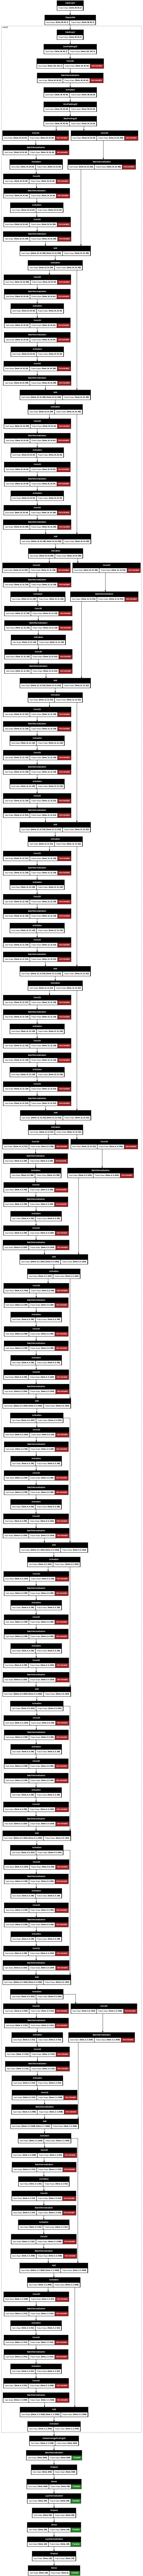

In [ ]:
# Freeze all layers in MobileNetV3Small to use it solely as a feature extractor
mobilenet.trainable = False

# Define input layer with shape matching the input images
inputs = tfk.Input(shape=(96, 96, 3), name='input_layer')


@tf.keras.utils.register_keras_serializable()
class RandomAugmentationLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(RandomAugmentationLayer, self).__init__(**kwargs)
        # Definisci i tuoi livelli di augmentazione
        self.flip_horizontal = tfkl.RandomFlip("horizontal")
        self.rotate_0_3 = tfkl.RandomRotation(0.3)
        self.translate = tfkl.RandomTranslation(0.2, 0.2)
        self.zoom_0_3 = tfkl.RandomZoom(0.3)
        self.contrast_0_4 = tfkl.RandomContrast(0.4)
        self.brightness_0_3 = tfkl.RandomBrightness(0.3)
        self.flip_vertical = tfkl.RandomFlip("vertical")
        self.rotate_0_1 = tfkl.RandomRotation(0.1)
        self.zoom_0_1 = tfkl.RandomZoom(0.1)

    def call(self, x, training=None):
        # Genera un numero casuale per selezionare una sequenza di augmentazione
        choice = tf.random.uniform([], minval=0, maxval=4, dtype=tf.int32)

        # Sequenza 1: Flip e Rotazione
        def seq1():
            x1 = self.flip_horizontal(x)
            x1 = self.rotate_0_3(x1)
            return x1

        # Sequenza 2: Traslazione e Zoom
        def seq2():
            x2 = self.translate(x)
            x2 = self.zoom_0_3(x2)
            return x2

        # Sequenza 3: Contrasto e Luminosità
        def seq3():
            x3 = self.contrast_0_4(x)
            x3 = self.brightness_0_3(x3)
            return x3

        # Sequenza 4: Flip Verticale, Piccola Rotazione e Zoom
        def seq4():
            x4 = self.flip_vertical(x)
            x4 = self.rotate_0_1(x4)
            x4 = self.zoom_0_1(x4)
            return x4

        # Usa tf.switch_case per selezionare la sequenza
        augmented_x = tf.switch_case(choice, branch_fns={0: seq1, 1: seq2, 2: seq3, 3: seq4})
        return augmented_x



# Definisci il pipeline completo di augmentazione
augmentation = tf.keras.Sequential([
    # Applica una delle augmentazioni casuali
    RandomAugmentationLayer(),

    # Altre augmentazioni indipendenti
    tfkl.RandomCrop(height=96, width=96),  # Regola la dimensione del crop se necessario
    tfkl.RandomFlip("horizontal_and_vertical"),
    tfkl.RandomRotation(0.3),
    tfkl.Dropout(0.1),
    tfkl.Dropout(0.2),
    tfkl.RandomContrast(0.3),
    tfkl.RandomZoom(0.15),
    tfkl.RandomBrightness(0.1),
], name='advanced_preprocessing')


#Apply the augmentation pipeline
x = augmentation(inputs)

# Pass augmented inputs through the MobileNetV3Small feature extractor
x = mobilenet(x)


x = tfkl.GlobalAveragePooling2D(name='avg_pool')(x)

# Add a batch normalization layer
x = tfkl.BatchNormalization(name='batch_norm')(x)

# Add a dropout layer for regularization
x = tfkl.Dropout(0.4, name='dropout')(x)

# Add a dense layer with 256 units and GELU activation
x = tfkl.Dense(256, activation='gelu', name='dense1')(x)

# Add layer normalization
x = tfkl.LayerNormalization(name='layer_norm1')(x)

# Add another dropout layer
x = tfkl.Dropout(0.4, name='dropout2')(x)

# Add a second dense layer with 128 units and GELU activation
x = tfkl.Dense(128, activation='gelu', name='dense2')(x)

# Add layer normalization
x = tfkl.LayerNormalization(name='layer_norm2')(x)

# Add another dropout layer
x = tfkl.Dropout(0.3, name='dropout3')(x)
# Add final Dense layer for classification with softmax activation
outputs = tfkl.Dense(8, activation='softmax', name='output')(x)

# Define the complete model linking input and output
tl_model = tfk.Model(inputs=inputs, outputs=outputs, name='model')

# Compila il modello con la perdita e l'ottimizzatore
tl_model.compile(
    loss=tfk.losses.CategoricalCrossentropy(),
    optimizer=tfk.optimizers.Adam(),
    metrics=['accuracy']
)

# Display a summary of the model architecture
tl_model.summary(expand_nested=True)


# Display model architecture with layer shapes and trainable parameters
tfk.utils.plot_model(tl_model, to_file='/tmp/model.png', expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

In [ ]:
from tqdm.keras import TqdmCallback


# Train the model
tl_history = tl_model.fit(
    x=X_train*255 ,
    y=y_train,
    batch_size=64,
    epochs=20,
    validation_data=(X_val*255 , y_val),
    callbacks=[tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=50,
                                           restore_best_weights=True)]
).history

# Calculate and print the best validation accuracy achieved
final_val_accuracy = round(max(tl_history['val_accuracy']) * 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')

predictions = tl_model.predict(X_train)
# Save the trained model to a file, including final accuracy in the filename
model_filename = '/tmp/Blood_Cells_MobileNetV3S_' + str(final_val_accuracy) + '.keras'
tl_model.save(model_filename)


Epoch 1/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 429s 3s/step - accuracy: 0.4343 - loss: 1.7362 - val_accuracy: 0.3400 - val_loss: 2.2553
Epoch 2/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 424s 3s/step - accuracy: 0.5909 - loss: 1.1766 - val_accuracy: 0.3233 - val_loss: 2.2406
Epoch 3/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 442s 3s/step - accuracy: 0.6334 - loss: 1.0129 - val_accuracy: 0.3344 - val_loss: 2.2957
Epoch 4/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 440s 3s/step - accuracy: 0.6265 - loss: 1.0311 - val_accuracy: 0.3406 - val_loss: 2.3538
Epoch 5/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 391s 3s/step - accuracy: 0.6545 - loss: 0.9644 - val_accuracy: 0.3239 - val_loss: 2.3660
Epoch 6/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 462s 3s/step - accuracy: 0.6555 - loss: 0.9615 - val_accuracy: 0.3411 - val_loss: 2.3534
Epoch 7/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 421s 3s/step - accuracy: 0.6697 - loss: 0.8943 - val_accuracy: 0.3400 - val_loss: 2.1603
Epoch 8/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 410s 3s/step - accuracy: 0.6855 - loss: 0.8836 - val_accu

In [ ]:
y_pred = tl_model.predict(X_test_final)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels
y_test_classes = y_test_final.argmax(axis=1)

print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       128
           1       0.44      0.23      0.30       327
           2       0.16      0.12      0.13       163
           3       0.40      0.50      0.45       304
           4       0.02      0.01      0.01       128
           5       0.12      0.48      0.20       149
           6       0.45      0.16      0.23       349
           7       0.45      0.65      0.53       246

    accuracy                           0.30      1794
   macro avg       0.25      0.27      0.23      1794
weighted avg       0.32      0.30      0.28      1794



Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ advanced_preprocessing (Sequential)  │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ lambda_15 (Lambda)              │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ random_crop_17 (RandomCrop)     │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ random_flip_39 (RandomFlip)     │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ random_rotation_36              │ (None, 96, 96, 3)           │               0 │
│ (RandomRotation)                     │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ dropout_14 (Dropout)            │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ dropout_15 (Dropout)            │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ random_contrast_26              │ (None, 96, 96, 3)           │               0 │
│ (RandomContrast)                     │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ random_zoom_36 (RandomZoom)     │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ random_brightness_21            │ (None, 96, 96, 3)           │               0 │
│ (RandomBrightness)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MobileNetV3Small (Functional)        │ (None, 3, 3, 576)           │         939,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ input_layer_19 (InputLayer)     │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ rescaling_6 (Rescaling)         │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ conv (Conv2D)                   │ (None, 48, 48, 16)          │             432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ conv_bn (BatchNormalization)    │ (None, 48, 48, 16)          │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ activation_108 (Activation)     │ (None, 48, 48, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ expanded_conv_depthwise_pad     │ (None, 49, 49, 16)          │               0 │
│ (ZeroPadding2D)                      │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ expanded_conv_depthwise         │ (None, 24, 24, 16)          │             144 │
│ (DepthwiseConv2D)                    │                             │              

 Total params: 1,490,954 (5.69 MB)

 Trainable params: 183,560 (717.03 KB)

 Non-trainable params: 940,272 (3.59 MB)

 Optimizer params: 367,122 (1.40 MB)

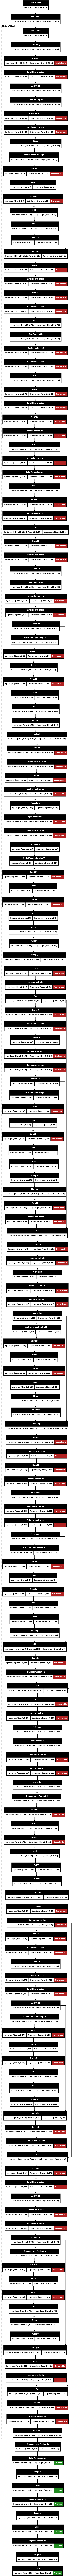

In [ ]:
# Re-load the model after transfer learning
ft_model = tfk.models.load_model('/tmp/Blood_Cells_MobileNetV3S_63.88.keras')

# Display a summary of the model architecture
ft_model.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
tfk.utils.plot_model(ft_model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

In [ ]:
# Set the MobileNetV3Small model layers as trainable
ft_model.get_layer('MobileNetV3Small').trainable = True

# Set all MobileNetV3Small layers as non-trainable
for layer in ft_model.get_layer('MobileNetV3Small').layers:
    layer.trainable = False

# Enable training only for Conv2D and DepthwiseConv2D layers
for i, layer in enumerate(ft_model.get_layer('MobileNetV3Small').layers):
    if isinstance(layer, tf.keras.layers.Conv2D) or isinstance(layer, tf.keras.layers.DepthwiseConv2D):
        layer.trainable = True
        print(i, layer.name, type(layer).__name__, layer.trainable)

2 conv Conv2D True
6 expanded_conv_depthwise DepthwiseConv2D True
10 expanded_conv_squeeze_excite_conv Conv2D True
12 expanded_conv_squeeze_excite_conv_1 Conv2D True
15 expanded_conv_project Conv2D True
17 expanded_conv_1_expand Conv2D True
21 expanded_conv_1_depthwise DepthwiseConv2D True
24 expanded_conv_1_project Conv2D True
26 expanded_conv_2_expand Conv2D True
29 expanded_conv_2_depthwise DepthwiseConv2D True
32 expanded_conv_2_project Conv2D True
35 expanded_conv_3_expand Conv2D True
39 expanded_conv_3_depthwise DepthwiseConv2D True
43 expanded_conv_3_squeeze_excite_conv Conv2D True
45 expanded_conv_3_squeeze_excite_conv_1 Conv2D True
48 expanded_conv_3_project Conv2D True
50 expanded_conv_4_expand Conv2D True
53 expanded_conv_4_depthwise DepthwiseConv2D True
57 expanded_conv_4_squeeze_excite_conv Conv2D True
59 expanded_conv_4_squeeze_excite_conv_1 Conv2D True
62 expanded_conv_4_project Conv2D True
65 expanded_conv_5_expand Conv2D True
68 expanded_conv_5_depthwise DepthwiseConv2

0 input_layer_19 False
1 rescaling_6 False
2 conv False
3 conv_bn False
4 activation_108 False
5 expanded_conv_depthwise_pad False
6 expanded_conv_depthwise False
7 expanded_conv_depthwise_bn False
8 re_lu_84 False
9 expanded_conv_squeeze_excite_avg_pool False
10 expanded_conv_squeeze_excite_conv False
11 expanded_conv_squeeze_excite_relu False
12 expanded_conv_squeeze_excite_conv_1 False
13 re_lu_85 False
14 expanded_conv_squeeze_excite_mul False
15 expanded_conv_project False
16 expanded_conv_project_bn False
17 expanded_conv_1_expand False
18 expanded_conv_1_expand_bn False
19 re_lu_86 False
20 expanded_conv_1_depthwise_pad False
21 expanded_conv_1_depthwise False
22 expanded_conv_1_depthwise_bn False
23 re_lu_87 False
24 expanded_conv_1_project False
25 expanded_conv_1_project_bn False
26 expanded_conv_2_expand False
27 expanded_conv_2_expand_bn False
28 re_lu_88 False
29 expanded_conv_2_depthwise False
30 expanded_conv_2_depthwise_bn False
31 re_lu_89 False
32 expanded_conv_2_proj

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ advanced_preprocessing (Sequential)  │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ lambda_15 (Lambda)              │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ random_crop_17 (RandomCrop)     │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ random_flip_39 (RandomFlip)     │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ random_rotation_36              │ (None, 96, 96, 3)           │               0 │
│ (RandomRotation)                     │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ dropout_14 (Dropout)            │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ dropout_15 (Dropout)            │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ random_contrast_26              │ (None, 96, 96, 3)           │               0 │
│ (RandomContrast)                     │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ random_zoom_36 (RandomZoom)     │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ random_brightness_21            │ (None, 96, 96, 3)           │               0 │
│ (RandomBrightness)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MobileNetV3Small (Functional)        │ (None, 3, 3, 576)           │         939,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ input_layer_19 (InputLayer)     │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ rescaling_6 (Rescaling)         │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ conv (Conv2D)                   │ (None, 48, 48, 16)          │             432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ conv_bn (BatchNormalization)    │ (None, 48, 48, 16)          │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ activation_108 (Activation)     │ (None, 48, 48, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ expanded_conv_depthwise_pad     │ (None, 49, 49, 16)          │               0 │
│ (ZeroPadding2D)                      │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ expanded_conv_depthwise         │ (None, 24, 24, 16)          │             144 │
│ (DepthwiseConv2D)                    │                             │              

 Total params: 1,490,954 (5.69 MB)

 Trainable params: 822,056 (3.14 MB)

 Non-trainable params: 301,776 (1.15 MB)

 Optimizer params: 367,122 (1.40 MB)

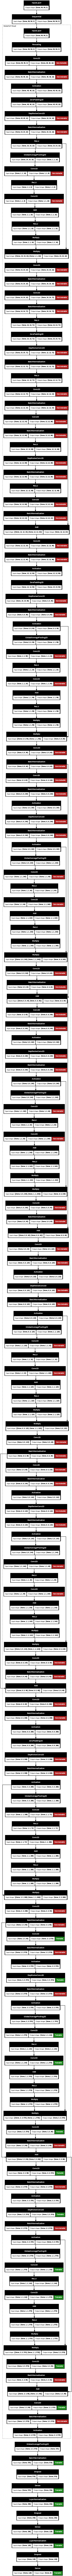

In [ ]:
# Set the number of layers to freeze
N = 124

# Set the first N layers as non-trainable
for i, layer in enumerate(ft_model.get_layer('MobileNetV3Small').layers[:N]):
    layer.trainable = False

# Print layer indices, names, and trainability status
for i, layer in enumerate(ft_model.get_layer('MobileNetV3Small').layers):
    print(i, layer.name, layer.trainable)

# Display a summary of the model architecture
ft_model.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
tfk.utils.plot_model(ft_model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

In [ ]:
# Compile the model
ft_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(1e-4), metrics=['accuracy'])

In [ ]:
# Fine-tune the model
ft_history = ft_model.fit(
    x = X_val*255,
    y = y_val,
    batch_size = 64,
    epochs = 20,
    validation_data = (X_test_final*255, y_test_final),
    callbacks = [tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=20, restore_best_weights=True)]
).history

# Calculate and print the final validation accuracy
final_val_accuracy = round(max(ft_history['val_accuracy'])* 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')

# Save the trained model to a file with the accuracy included in the filename
model_filename = '/tmp/Blood_Cells_MobileNetV3S_'+str(final_val_accuracy)+'.keras'
ft_model.save(model_filename)


Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - accuracy: 0.8007 - loss: 0.5611 - val_accuracy: 0.7609 - val_loss: 0.7269
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7886 - loss: 0.5743 - val_accuracy: 0.7464 - val_loss: 0.7603
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7892 - loss: 0.5813 - val_accuracy: 0.7096 - val_loss: 0.8365
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7915 - loss: 0.5775 - val_accuracy: 0.7090 - val_loss: 0.8238
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7841 - loss: 0.5558 - val_accuracy: 0.7430 - val_loss: 0.7252
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8025 - loss: 0.5745 - val_accuracy: 0.7219 - val_loss: 0.7993
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8049 - loss: 0.5330 - val_accuracy: 0.6945 - val_loss: 0.9247
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8100 - loss: 0.5422 - val_accuracy: 0.6711 - 

In [ ]:
y_pred = ft_model.predict(X_test_final)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels
y_test_classes = y_test_final.argmax(axis=1)

print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.02      0.05       128
           1       0.35      0.13      0.20       327
           2       0.13      0.01      0.02       163
           3       0.45      0.43      0.44       304
           4       0.00      0.00      0.00       128
           5       0.08      0.57      0.13       149
           6       0.58      0.08      0.14       349
           7       0.55      0.41      0.47       246

    accuracy                           0.22      1794
   macro avg       0.36      0.21      0.18      1794
weighted avg       0.40      0.22      0.22      1794



## 📊 Prepare Your Submission

To prepare your submission, create a `.zip` file that includes all the necessary code to run your model. It **must** include a `model.py` file with the following class:


The next cell shows an example implementation of the `model.py` file, which includes loading model weights from the `weights.keras` file and conducting predictions on provided input data. The `.zip` file is created and downloaded in the last notebook cell.

❗ Feel free to modify the method implementations to better fit your specific requirements, but please ensure that the class name and method interfaces remain unchanged.

In [ ]:
# file: /tmp/model.py
class Model:
    def __init__(self):
        """Initialize the internal state of the model."""

    def predict(self, X):
        """Return a numpy array with the labels corresponding to the input X."""

In [ ]:
%%writefile /tmp/model.py
import numpy as np

import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
class Model:
    def __init__(self):
        """
        Initialize the internal state of the model. Note that the __init__
        method cannot accept any arguments.

        The following is an example loading the weights of a pre-trained
        model.
        """
        self.neural_network = tfk.models.load_model('Blood_Cells_MobileNetV3S_72.8.keras')

    def predict(self, X):
        """
        Predict the labels corresponding to the input X. Note that X is a numpy
        array of shape (n_samples, 96, 96, 3) and the output should be a numpy
        array of shape (n_samples,). Therefore, outputs must no be one-hot
        encoded.

        The following is an example of a prediction from the pre-trained model
        loaded in the __init__ method.
        """
        preds = self.neural_network.predict(X)
        if len(preds.shape) == 2:
            preds = np.argmax(preds, axis=1)
        return preds

Overwriting /tmp/model.py


In [ ]:
from datetime import datetime
filename = f'/tmp/submission_{datetime.now().strftime("%y%m%d_%H%M%S")}.zip'

# Add files to the zip command if needed
# The original path was incorrect. Using f-string to format correctly.
!zip {filename} /tmp/model.py /tmp/Blood_Cells_MobileNetV3S_72.8.keras

from google.colab import files
files.download(filename)

  adding: tmp/model.py (deflated 55%)
  adding: tmp/Blood_Cells_MobileNetV3S_72.8.keras (deflated 12%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>